In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import scipy.stats as stats
from sklearn.neighbors import kneighbors_graph, NearestNeighbors
import copy
from sklearn import svm
import time
from bokeh.plotting import figure, show
import scipy
import scipy.sparse as sparse
import matplotlib.pyplot as plt

In [2]:
N = 30 
t = np.arange(1, N + 1, 1)
x = np.random.standard_normal(N)

In [3]:
x, t

(array([ 0.38315235,  0.12765798,  0.9062131 ,  0.86871029, -1.49039699,
        -0.87833027,  0.42576462,  2.06140977,  0.76995101, -0.86974625,
        -1.16176893,  1.66835419, -0.51815966,  0.32423055, -0.92853466,
        -0.66192523, -2.47070606, -0.8015037 ,  0.11087032, -1.67900666,
         0.05878975,  0.71748677,  0.65607207, -1.02454049, -0.33960888,
         0.96154417, -1.713304  , -0.49410712,  0.20496821,  1.79657035]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]))

In [4]:
y = np.cos(t) + 0.1 * x

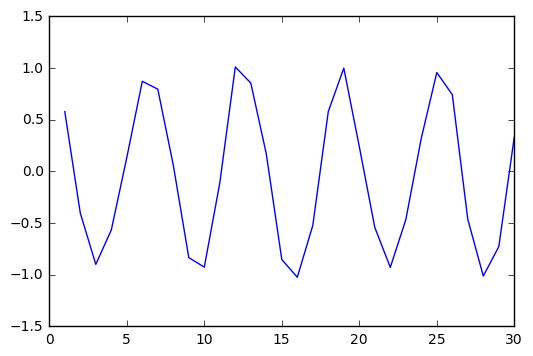

In [5]:
plt.plot(t, y)
plt.show()

In [6]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [7]:
T = t[:, None]

In [8]:
rf.fit(t[:, None], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [9]:
y_hat = rf.predict(T)

In [10]:
rf.set_params()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [11]:
from BSDE import *

In [12]:
T = 0.5
K = 100.
S0 = 100.
sigma = 0.2
p = 1
M = np.eye(p)
r = 0.04
mu = 0.06
R = 0.06
Q = 0.

In [47]:
N = 10000
m = 6
RF_max_leaf_nodes = 1000
RF_n_trees = 200
M_run = 5
n_picard = 3

In [18]:
from scipy.optimize import leastsq, curve_fit

In [48]:
def func((RF_min_samples_leaf, 
         RF_max_depth)): 
    pricing = 0
    for __ in range(M_run): 
        test = BsdeHD(T, K, M, mu, Q, sigma, S0, r, R)
        price = test.get_price(N, m, option_payoff='geometric',
                                                   RF_max_leaf_nodes=int(RF_max_leaf_nodes),
                                                   RF_min_samples_leaf=RF_min_samples_leaf,
                                                   oType='European',
                                                   n_picard=n_picard, 
                                                   RF_warm_start = False, 
                                                   RF_max_depth=RF_max_depth)
        pricing = pricing + 1. / M_run * price
    print (pricing)
    return (pricing - 7.15) ** 2

In [49]:
rranges = (slice(0.05, 0.95, 0.05), slice(10, N, 10))

In [ ]:
res = scipy.optimize.brute(func, rranges)

7.1397858714


In [ ]:
y_data = x ** 2

In [ ]:
res

In [ ]:
def f(x, a, b, c): 
    return a * x ** 2 + b * x + c

In [ ]:
curve_fit(f, x_data, y_data, np.array([1., 0., 0.]))

In [37]:
int(slice(10, 20, 5))

TypeError: int() argument must be a string or a number, not 'slice'

In [ ]:
res